In [1]:
#import libraries:
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib.image import imread 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray
from PIL import Image
from skimage import io
from numpy import *
import plotnine as p9
from tensorflow.linalg import eigh

In [2]:
#read in image CSV file:
imgs = pd.read_csv("../data/vehcle_img_data.csv")
imgs.head()


C:\Users\kxu97\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.


,Image_Path,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity
0,vehicle_images/1633889154186_Toyota Hilux 2006...,Toyota,Hilux,Hilux,2006,Used,Manual,SUV / 4x4,Diesel,"2,500 cc"
1,vehicle_images/1633889154395_Land Rover Freela...,Land Rover,Freelander,1999,1999,Used,Manual,SUV / 4x4,Diesel,"1,990 cc"
2,vehicle_images/1633889154545_Nissan Leaf G Gra...,Nissan,Leaf,G Grade,2014,Used,Automatic,Hatchback,Electric,70 cc
3,vehicle_images/1633889154697_Mercedes Benz C20...,Mercedes Benz,C200,C-Cabriolet AMG Line,2016,Used,Automatic,Convertible,Petrol,"2,000 cc"
4,vehicle_images/1633889154870_Toyota Vitz 2018 ...,Toyota,Vitz,2018,2018,Used,Automatic,Hatchback,Petrol,"1,000 cc"


For the scope of this project, we will only consider 5 different classes.

In [3]:
#encode the response variable:
#ensure response column is of categorical datatype:
imgs["Body"] = imgs["Body"].astype("category").cat.codes

#assign numerical labels:
#imgs["Body"] = imgs["Body"].cat.codes
#imgs = imgs[imgs["Body"] <= 5]
imgs.head()

,Image_Path,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity
0,vehicle_images/1633889154186_Toyota Hilux 2006...,Toyota,Hilux,Hilux,2006,Used,Manual,14,Diesel,"2,500 cc"
1,vehicle_images/1633889154395_Land Rover Freela...,Land Rover,Freelander,1999,1999,Used,Manual,14,Diesel,"1,990 cc"
2,vehicle_images/1633889154545_Nissan Leaf G Gra...,Nissan,Leaf,G Grade,2014,Used,Automatic,6,Electric,70 cc
3,vehicle_images/1633889154697_Mercedes Benz C20...,Mercedes Benz,C200,C-Cabriolet AMG Line,2016,Used,Automatic,4,Petrol,"2,000 cc"
4,vehicle_images/1633889154870_Toyota Vitz 2018 ...,Toyota,Vitz,2018,2018,Used,Automatic,6,Petrol,"1,000 cc"


In [4]:
imgs["Body"].value_counts()

 3     21984
 10    15723
 20     5595
 6      5502
 17     5099
 15     4787
 8      4248
 13     3583
 14     3282
 12     1492
-1      1224
 19     1076
 1      1070
 18      779
 0       617
 16      584
 21      513
 7       351
 2       158
 9       149
 5       111
 4        50
 11        3
Name: Body, dtype: int64

To avoid class imbalance and skewness, we will pick classes with similar number of images belonging to them.

In [5]:
imgs = imgs[imgs["Body"].isin([20,6,17,15,8])]
imgs.head()

,Image_Path,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity
2,vehicle_images/1633889154545_Nissan Leaf G Gra...,Nissan,Leaf,G Grade,2014,Used,Automatic,6,Electric,70 cc
4,vehicle_images/1633889154870_Toyota Vitz 2018 ...,Toyota,Vitz,2018,2018,Used,Automatic,6,Petrol,"1,000 cc"
5,vehicle_images/1633889155051_Toyota Starlet EP...,Toyota,Starlet,EP71,1990,Used,Manual,6,Petrol,"1,300 cc"
6,vehicle_images/1633889155191_Toyota Aqua S 201...,Toyota,Aqua,S,2014,Used,Automatic,6,Hybrid,"1,500 cc"
8,vehicle_images/1633889155496_Toyota Axio editi...,Toyota,Axio,edition,2015,Used,Automatic,15,Petrol,"1,500 cc"


In [6]:
#create response vector:
response = imgs["Body"].to_numpy()

In [7]:
len(imgs)

25231

In [8]:
len(response)

25231

In [9]:
#extract rows where image_path is not blank:
#replace blanks in image path col with NA:
imgs["Image_Path"].replace('', np.nan, inplace=True)

#keep rows without NA in the image path column:
imgs = imgs[imgs["Image_Path"].notna()]
print(len(imgs))

25231


In [10]:
#load an image:
print(imgs.iat[10200,0])
string = "../data/" + imgs.iat[10199,0]
img = rgb2gray(np.array(Image.open(string)))

vehicle_images/1635928138821_Toyota Vitz KSP90 2007 for sale.jpg


(107, 142)


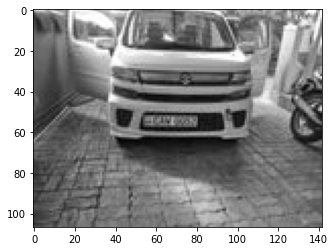

In [11]:
plt.imshow(img, cmap = "gray" )
print(np.shape(img))

(75, 100)
[[0.71607059]
 [0.80486784]
 [0.81128941]
 ...
 [0.41195725]
 [0.39234941]
 [0.37609765]]


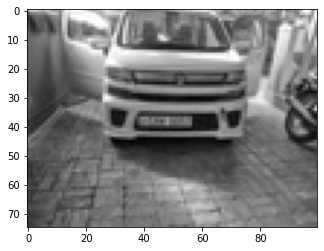

In [12]:
img2 = rgb2gray(np.array(Image.open(string).resize((100,75)))) # reshaping dimensions to smallest image size: 100x75
plt.imshow(img2, cmap = "gray")
print(np.shape(img2))
print(np.asarray(img2).reshape(7500,1))

In [13]:
#create function to resize images to smallest dimension in dataset:
def img_resize(img_df, img_loc, dims = (100,75)):
    #create image path and open image:
    string = "../data/" + img_df.iat[img_loc]
    try:
        img = rgb2gray(np.array(Image.open(string).resize(dims)))
        #convert image to numpy vector:
        img_vec = img.reshape(7500,1)
        return img_vec
    except:
        pass

In [14]:
#resize images so that they are the same size:
img_vec = [(img_resize(imgs, (i,0))) for i in range(0,len(imgs))]

In [15]:
#verify that this vector corresponds to the one printed earlier:
(img_vec[10199])

array([[0.71607059],
       [0.80486784],
       [0.81128941],
       ...,
       [0.41195725],
       [0.39234941],
       [0.37609765]])

In [16]:
#extract arrays from list of arrays:
imgs_concat = [img_vec[i] for i in range(len(img_vec))]

In [17]:
np.shape(imgs_concat)

(25231, 7500, 1)

In [18]:
#concatenate all image vectors into one matrix:
img_array = np.stack(imgs_concat, axis = 0)

In [19]:
#get dims of data matrix:
np.shape(img_array)

(25231, 7500, 1)

In [20]:
#convert from 3d array to 2d array:
img_array = img_array.reshape(25231,(7500*1))

In [21]:
#verify matrix dims:
print(np.shape(img_array))


(25231, 7500)


In [22]:
#change datatype to reduce stroage space:
img_array = img_array.astype("float32")

In [23]:
#Turn array into npz file:
savez_compressed("img_array.npz", img_array)

In [24]:
#load in data matrix:
dat = np.load("img_array.npz")

#extract data matrix from npz file:
dat = dat["arr_0"]                        

In [25]:
print(np.shape(dat))
#convert datatype to float32:
dat = dat.astype("float32") # 25231 images, 7500 features

(25231, 7500)


# Part 1: PCA:

First, we compute the principal component vectors for our dataset, and determine how many to use.

We will apply eigendecomposition to the original dataset to achieve 7500 e-vec/eval pairs. They will be ordered by proportion of explained variance in descending order. We will select the first k eigenvectors that explain ~80% of the total variance in the dataset.

In [26]:
#check if dat is symmetric:
np.all(dat) == np.all(dat.T)

True

In [27]:
#standardize each value by its column mean and column standard deviation:
dat_standard = (dat - np.mean(dat, axis = 0))/np.std(dat,axis=0)
#calculate covariance matrix of meaned data:
cov_mat = np.cov(dat_standard, rowvar = False)
print(np.shape(cov_mat))

(7500, 7500)


In [28]:
# Compute eigenvalues and eigenvectors of covariance matrix:
evals, evecs = np.linalg.eig(cov_mat) 
print(3)
#order the eigenvalues/vectors in descending order:
index = np.argsort(evals)[::-1]
print(4)
evals_sort = evals[index]
print(5)
evecs_sort = evecs[:,index]

3
4
5


In [29]:
evals

array([9.14656744e+02, 6.36609182e+02, 5.08289961e+02, ...,
       4.85558518e-03, 4.85105216e-03, 4.86557464e-03])

In [30]:
np.shape(evals) 

(7500,)

In [31]:
evecs

array([[ 0.01109357, -0.01244886, -0.0018065 , ..., -0.00101687,
         0.00218906, -0.00108259],
       [ 0.01121084, -0.01267738, -0.00199055, ...,  0.00247949,
         0.00759517, -0.00021256],
       [ 0.01122605, -0.01279889, -0.00218369, ..., -0.00457513,
        -0.01715731,  0.00827884],
       ...,
       [ 0.01771023, -0.0053296 ,  0.01184525, ...,  0.01152135,
        -0.02228501, -0.02313384],
       [ 0.0175738 , -0.00547125,  0.01165353, ..., -0.00316375,
        -0.0008929 ,  0.02039721],
       [ 0.01747008, -0.00563832,  0.01142987, ...,  0.00148235,
         0.01209367, -0.01196868]])

In [32]:
np.shape(evecs) 

# 7500 components of each eigenvector. # 7500 total eigenvectors

(7500, 7500)

Next, we determine the optimal amount of principal components to use for the data. We will do this by calculating the percentage of variance in the data that is explained by each principal component. The proportion of total variance explained by the $i^{th}$ principal component is:

$$\frac{\lambda_i}{\lambda_1 + \lambda_2 + ... + \lambda_n}$$

In [33]:
#calculate variation accounted for by each principal component:
var_func = lambda x: x/np.sum(evals_sort)
var_explained = [var_func(evals_sort) for i in evals_sort]

In [34]:
print(np.shape(var_explained))

(7500, 7500)


In [35]:
var_explained = np.cumsum(var_explained[0])
print(np.shape(var_explained))

(7500,)


In [36]:
plot_df = pd.DataFrame(data = {
    "Variance":np.real(var_explained),
    "Number of Principal Components": list(range(1,len(var_explained)+1))
})

plot_df.head()

,Variance,Number of Principal Components
0,0.121949,1
1,0.206827,2
2,0.274596,3
3,0.329414,4
4,0.366718,5


In [37]:
print(plot_df['Number of Principal Components'].isnull().values.any())
print(plot_df['Variance'].isnull().values.any())

False
False


C:\Users\kxu97\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 4000 rows containing missing values.


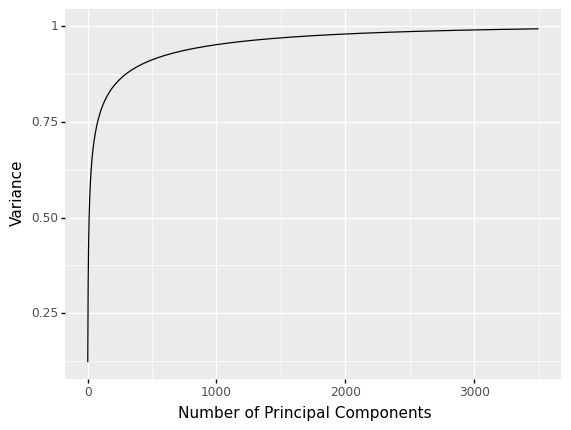

<ggplot: (161895239412)>

In [38]:
#: Variance against Number of Principal Components
var_plot = p9.ggplot(data = plot_df)
var_plot += p9.aes(x = "Number of Principal Components", y = "Variance")
var_plot += p9.geom_line()
var_plot += p9.xlim(0,3500)

var_plot

In [39]:
np.shape(dat_standard) # nxp: 25231 x 7500

(25231, 7500)

In [40]:
np.shape(evecs) # kxp: 

(7500, 7500)

In [41]:
evecs_transform = evecs[0:280,:] # 280 x 7500

In [42]:
dat_transform = dat_standard@(evecs_transform.T)  

In [43]:
np.shape(dat_transform) #np.shape(dat_transform)

(25231, 280)

In [45]:
subset_var_explained = var_explained[280]
subset_var_explained

0.8706981361076647

### Without-PCA data: (kernel, neural network)
* 25231 x 750

In [48]:
savez_compressed("dat_standard.npz", dat_standard)
savez_compressed("response.npz", response)

# to load in data in other notebooks use this:

#load in data matrix:
#dat = np.load("dat_standard.npz")

#extract data matrix from npz file:
#dat = dat["arr_0"]   

### With-PCA data:(for knn)
- Reduced data from 7500 variables to 500. 
- The 500 variables account for 91.223% of total variance in the data.
- Transformed data has dimensions: 25231 x 500. (25231 observations, 500 features)

In [46]:
savez_compressed("dat_transform.npz", dat_transform)

# to load in data in other notebooks use this:

#load in data matrix:
#dat = np.load("img_array.npz")

#extract data matrix from npz file:
#dat = dat["arr_0"]   

In [47]:
savez_compressed("response.npz", response)